In [3]:


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

In [4]:
df = pd.read_csv('data/data_Chennai.csv')

In [5]:
train_dates = pd.to_datetime(df['Date'])

In [6]:
cols = list(df)[1:8]
print(cols) 


['no2', 'so2', 'pm2_5', 'pm10', 'o3', 'nh3', 'no']


<AxesSubplot:>

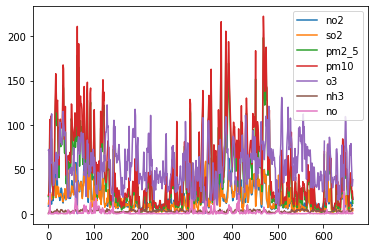

In [7]:
df_for_training = df[cols].astype(float)
df_for_plot=df_for_training
df_for_plot.plot.line()


In [8]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [9]:
trainX = []
trainY = []
n_future = 1  
n_past = 14  

In [10]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [11]:
model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model1.add(LSTM(32, activation='relu', return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(trainY.shape[1]))

model1.compile(optimizer='adam', loss='mse')

In [12]:
history = model1.fit(trainX, trainY, epochs=5, batch_size=100, validation_split=.1, verbose=1)

Epoch 1/5
6/6 [==============================] - 2s 49ms/step - loss: 0.9643 - val_loss: nan
Epoch 2/5
6/6 [==============================] - 0s 11ms/step - loss: 0.7605 - val_loss: nan
Epoch 3/5
6/6 [==============================] - 0s 11ms/step - loss: 0.6260 - val_loss: nan
Epoch 4/5
6/6 [==============================] - 0s 11ms/step - loss: 0.6274 - val_loss: nan
Epoch 5/5
6/6 [==============================] - 0s 10ms/step - loss: 0.6006 - val_loss: nan


In [13]:
!mkdir saved_model
model1.save('saved_model/my_model_1_5.h5')

A subdirectory or file saved_model already exists.


In [14]:
model = tf.keras.models.load_model('saved_model/lstm_model_Chennai.h5')

In [15]:
n_past = 16
n_days_for_prediction=30 
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()

In [16]:

prediction = model.predict(trainX[-n_days_for_prediction:]) 
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


In [17]:

prediction = model.predict(trainX[-n_days_for_prediction:]) 
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,1]

In [18]:
y_pred_future

array([ 5.9593306,  4.7441425,  6.2241592,  8.364525 , 19.273897 ,
        9.217401 ,  9.932324 ,  9.349685 , 11.41135  , 12.205565 ,
       14.130747 , 18.56262  , 13.278787 ,  5.51892  , 10.069851 ,
        8.408552 , 16.631748 , 31.91316  , 31.53118  , 25.002493 ,
       21.390455 , 18.327858 , 20.049269 ,  8.390078 ,  7.7544184,
       11.063675 ,  6.7114944,  8.000216 ,  8.020531 ,  8.078544 ],
      dtype=float32)

In [19]:
scaler.inverse_transform(prediction_copies)[:,2]

array([12.459715,  9.034601, 13.206158, 19.238966, 49.98798 , 21.64287 ,
       23.657946, 22.015724, 27.826708, 30.065273, 35.49156 , 47.983185,
       33.09024 , 11.218378, 24.045576, 19.36306 , 42.54085 , 85.61285 ,
       84.536194, 66.13452 , 55.953686, 47.321484, 52.17343 , 19.310987,
       17.519327, 26.846756, 14.579754, 18.212128, 18.269388, 18.432903],
      dtype=float32)

In [20]:
scaler.inverse_transform(prediction_copies)[:,6]

array([-0.91421443, -1.1954654 , -0.85292083, -0.35754043,  2.1673958 ,
       -0.16014524,  0.00532131, -0.1295286 ,  0.34763664,  0.5314551 ,
        0.9770315 ,  2.0027733 ,  0.77984834, -1.0161458 ,  0.03715139,
       -0.34735042,  1.5558795 ,  5.0927095 ,  5.0043015 ,  3.4932594 ,
        2.657266  ,  1.9484382 ,  2.3468528 , -0.35162646, -0.4987474 ,
        0.26716858, -0.7401286 , -0.4418586 , -0.43715674, -0.42372972],
      dtype=float32)

In [21]:
for i in range(10):
    print(scaler.inverse_transform(prediction_copies)[:,i],i)

[ 8.734426   7.617776   8.97778   10.944587  20.969336  11.728305
 12.385257  11.849862  13.74435   14.474164  16.243235  20.315735
 15.46036    8.329727  12.511631  10.9850445 18.541433  32.583702
 32.232697  26.233408  22.914267  20.10001   21.681833  10.968067
 10.383953  13.424868   9.425598  10.609819  10.628488  10.681796 ] 0
[ 5.9593306  4.7441425  6.2241592  8.364525  19.273897   9.217401
  9.932324   9.349685  11.41135   12.205565  14.130747  18.56262
 13.278787   5.51892   10.069851   8.408552  16.631748  31.91316
 31.53118   25.002493  21.390455  18.327858  20.049269   8.390078
  7.7544184 11.063675   6.7114944  8.000216   8.020531   8.078544 ] 1
[12.459715  9.034601 13.206158 19.238966 49.98798  21.64287  23.657946
 22.015724 27.826708 30.065273 35.49156  47.983185 33.09024  11.218378
 24.045576 19.36306  42.54085  85.61285  84.536194 66.13452  55.953686
 47.321484 52.17343  19.310987 17.519327 26.846756 14.579754 18.212128
 18.269388 18.432903] 2
[ 16.616121   12.698422   

IndexError: index 7 is out of bounds for axis 1 with size 7